In [11]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening, RotationalBroadening
from broadpy.utils import load_example_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# load PHOENIX model (R~1e6)
wave, flux = load_example_data()

In [13]:
IB = InstrumentalBroadening(wave, flux)
RB = RotationalBroadening(wave, flux)

In [14]:
R = 1e5
fwhm = 2.998e5/R
gamma= 1.0
# Instrumental broadening
flux_fwhm = IB(fwhm=fwhm, kernel='gaussian')
flux_gamma = IB(gamma=1.0, kernel='lorentzian')
n_edge_fwhm = 2 * int(np.mean(wave) / np.mean(np.diff(wave)) / R)

In [15]:
# RB
vsini = 5.0
eps = 0.6
flux_vsini = RB(vsini=vsini, epsilon=eps)
flux_vsini_fwhm = InstrumentalBroadening(wave, flux_vsini)(fwhm=fwhm, kernel='gaussian')
flux_vsini_gamma = InstrumentalBroadening(wave, flux_vsini)(gamma=gamma, kernel='lorentzian')

 IG = Instrumental Gaussian broadening (fwhm=3.00 km/s)
 IL = Instrumental Lorentzian broadening (gamma=1.00 km/s)
 RB = Rotational Broadening (vsini=5.00 km/s, epsilon=0.60)


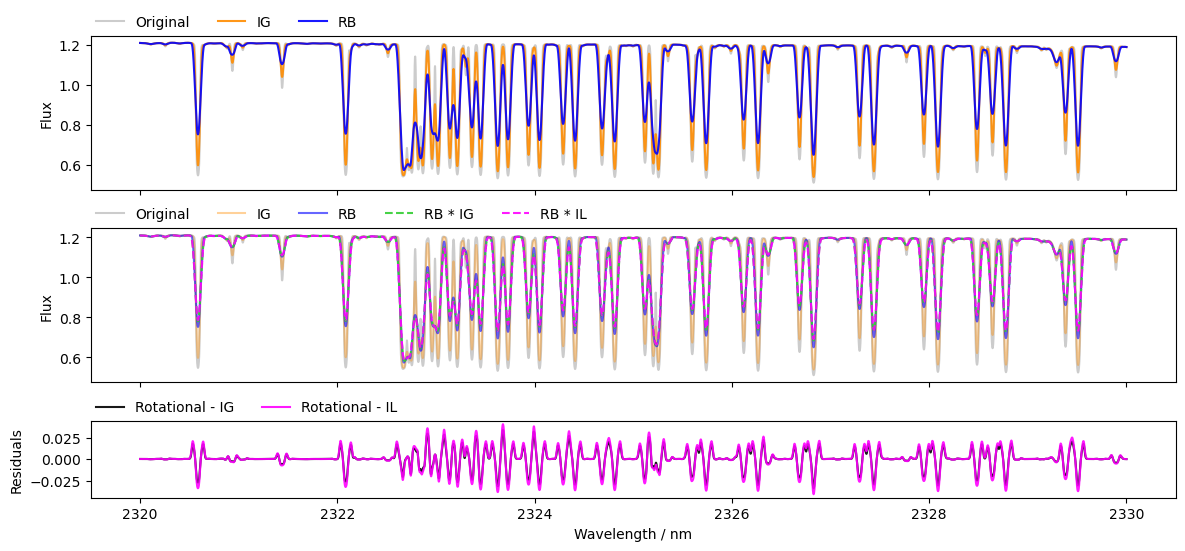

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(14, 6), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1],
                                                                        'hspace':0.3})
print(f' IG = Instrumental Gaussian broadening (fwhm={fwhm:.2f} km/s)')
print(f' IL = Instrumental Lorentzian broadening (gamma={gamma:.2f} km/s)')
print(f' RB = Rotational Broadening (vsini={vsini:.2f} km/s, epsilon={eps:.2f})')
for i, axi in enumerate(ax[:2]):
    
    
    axi.plot(wave, flux, label='Original', alpha=0.2, color='black')
    axi.plot(wave, flux_fwhm, label='IG', color='darkorange', alpha=0.9 - 0.5*i)
    axi.plot(wave, flux_vsini, label='RB', color='blue', alpha=0.9 - 0.3*i)
    
ax[1].plot(wave, flux_vsini_fwhm, label='RB * IG', color='limegreen', alpha=0.9, ls='--')
ax[1].plot(wave, flux_vsini_gamma, label='RB * IL', color='magenta', alpha=0.9, ls='--')

# residuals between flux_vsini and flux_vsini_fwhm
res = flux_vsini - flux_vsini_fwhm
ax[-1].plot(wave, res, color='black', alpha=0.9, label='Rotational - IG')

res_gamma = flux_vsini - flux_vsini_gamma
ax[-1].plot(wave, res_gamma, color='magenta', alpha=0.9, label='Rotational - IL')


[axi.set_ylabel('Flux') for axi in ax[:2]]

ax[0].legend(ncol=10, loc=(0.0, 1.01), frameon=False)
ax[1].legend(ncol=10, loc=(0.0, 1.01), frameon=False)
[axi.legend(ncol=10, loc=(0.0, 1.01), frameon=False) for axi in ax]
ax[-1].set(xlabel='Wavelength / nm', ylabel='Residuals')
plt.show()
